In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors

import sys
sys.path.append('../')
import utils


In [2]:
#plt.style.use('seaborn')

plt.rcParams["axes.titlesize"] = 24
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["lines.linewidth"] = 3
plt.rcParams["lines.markersize"] = 8
plt.rcParams["xtick.labelsize"] = 16
plt.rcParams["ytick.labelsize"] = 16
plt.rcParams["font.size"] = 24
plt.rcParams["legend.fontsize"] = 16

plt.rcParams["figure.figsize"] = (8, 8)

(0.0, 0.2)

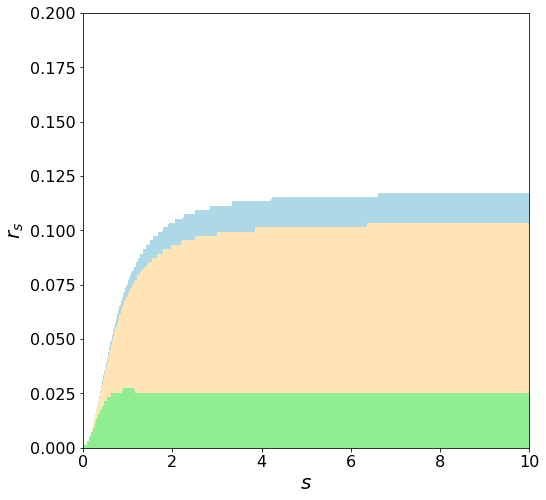

In [3]:
fig, ax = plt.subplots()

alphas=[10, 1, 0.2]
alphas_str = [str(a).replace('.','-') for a in alphas] 
files=['region_alpha_' + ext + '.csv' for ext in alphas_str]
fill_colors=['lightblue', 'moccasin', 'lightgreen']

for file, fill_color, alpha in zip(files, fill_colors, alphas):

  df = pd.read_csv(file, header=None)
  data = df.values.reshape(1001, 100, 3)

  s = data[:,0,0]
  rs = data[0,:,1]
  z = data[:,:,-1].T

  cmap = colors.ListedColormap(["none", fill_color])

  ax.contourf(s, rs, z, cmap=cmap)
  ax.scatter(-1,-1, color=fill_color, marker="s", label=rf'$\alpha = {alpha}$')

  ax.set_xlabel('$s$')
  ax.set_ylabel('$r_s$')

ax.set_xlim(0, 10)
ax.set_ylim(0, 0.2)



In [4]:


x = np.linspace(0, 0.003)

n0 = 238732
n0_grad = 1e8
n = n0 + n0_grad*x

s_trace = utils.get_s(n, n0_grad)
r_s_trace = utils.get_r_s(n)

ax.plot(s_trace, r_s_trace, color='black', label='example density')

ax.legend()
ax.grid(alpha=0.4)

fig.savefig('scan_counter_example.pdf', bbox_inches='tight')
fig
